# Assignment Prep - Association Rule Mining

We will use [The Bread Basket Dataset](https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket). The dataset belongs to "The Bread Basket" a bakery located in Edinburgh.

Opendatasets is a python package which makes it easier to import datasets from Kaggle.

Prerequisites:

- Kaggle Account (preferrably using BU email ID)

Run the following two cells. In the second cell you will be prompted to enter username and key.

Use this link - https://www.kaggle.com/settings/account

- On the right side of your screen you can see your username.
- Scroll down a bit, you will see an API subheading. Click on '**Create new token**'.
- It should automatically download a .json file containing your username and key.
- Copy paste them into the output of the 2nd cell.

Your dataset will be visible in the folders tab on the left side of your colab screen!!

In [1]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download(
    "https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket")

Skipping, found downloaded files in "./the-bread-basket" (use force=True to force download)


### This cell is for installing any python packages you want to use

In [4]:
#!pip install your-package-name

# Question 1 **(5 Points)**

In terms of purchase volume, find the top 5 *single* item recommendations based on any *single* item purchases in the bakery. These recommendations will be used to optimally place the two items within reach from to each other.

Use the apriori algorithm with a reasonable minimum support (Justify your choice).

By what percentage has the apriori method reduced the computational cost of solving this query? Feel free to use a theoretical approach or an empirical one.

In [5]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [6]:
Bread_df = pd.read_csv("/content/the-bread-basket/bread basket.csv")
Bread_df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [7]:
Bread_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [8]:
Bread_df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [9]:
Bread_df.describe(include = "object")

,Item,date_time,period_day,weekday_weekend
count,20507,20507,20507,20507
unique,94,9182,4,2
top,Coffee,05-02-2017 11:58,afternoon,weekday
freq,5471,12,11569,12807


In [10]:
Bread_df["Item"] = Bread_df["Item"].str.lower()
Bread_df["Item"]

0                bread
1         scandinavian
2         scandinavian
3        hot chocolate
4                  jam
             ...      
20502           coffee
20503              tea
20504           coffee
20505           pastry
20506        smoothies
Name: Item, Length: 20507, dtype: object

In [11]:
Item_List = Bread_df["Item"].unique().tolist()
len(Item_List)

94

In [12]:
len(Bread_df["Transaction"].unique())

9465

In [13]:
sorted(Item_List)

['adjustment',
 'afternoon with the baker',
 'alfajores',
 'argentina night',
 'art tray',
 'bacon',
 'baguette',
 'bakewell',
 'bare popcorn',
 'basket',
 'bowl nic pitt',
 'bread',
 'bread pudding',
 'brioche and salami',
 'brownie',
 'cake',
 'caramel bites',
 'cherry me dried fruit',
 'chicken sand',
 'chicken stew',
 'chimichurri oil',
 'chocolates',
 'christmas common',
 'coffee',
 'coffee granules ',
 'coke',
 'cookies',
 'crepes',
 'crisps',
 'drinking chocolate spoons ',
 'duck egg',
 'dulce de leche',
 'eggs',
 "ella's kitchen pouches",
 'empanadas',
 'extra salami or feta',
 'fairy doors',
 'farm house',
 'focaccia',
 'frittata',
 'fudge',
 'gift voucher',
 'gingerbread syrup',
 'granola',
 'hack the stack',
 'half slice monster ',
 'hearty & seasonal',
 'honey',
 'hot chocolate',
 'jam',
 'jammie dodgers',
 'juice',
 'keeping it local',
 'kids biscuit',
 'lemon and coconut',
 'medialuna',
 'mighty protein',
 'mineral water',
 'mortimer',
 'muesli',
 'muffin',
 'my-5 fruit s

We notice some leading spaces, hence we will use strip in order to get rid of them.

In [14]:
Bread_df["Item"] = Bread_df["Item"].str.strip()
Bread_df["Item"]

0                bread
1         scandinavian
2         scandinavian
3        hot chocolate
4                  jam
             ...      
20502           coffee
20503              tea
20504           coffee
20505           pastry
20506        smoothies
Name: Item, Length: 20507, dtype: object

In [15]:
Item_List = Bread_df["Item"].unique().tolist()
sorted(Item_List)

['adjustment',
 'afternoon with the baker',
 'alfajores',
 'argentina night',
 'art tray',
 'bacon',
 'baguette',
 'bakewell',
 'bare popcorn',
 'basket',
 'bowl nic pitt',
 'bread',
 'bread pudding',
 'brioche and salami',
 'brownie',
 'cake',
 'caramel bites',
 'cherry me dried fruit',
 'chicken sand',
 'chicken stew',
 'chimichurri oil',
 'chocolates',
 'christmas common',
 'coffee',
 'coffee granules',
 'coke',
 'cookies',
 'crepes',
 'crisps',
 'drinking chocolate spoons',
 'duck egg',
 'dulce de leche',
 'eggs',
 "ella's kitchen pouches",
 'empanadas',
 'extra salami or feta',
 'fairy doors',
 'farm house',
 'focaccia',
 'frittata',
 'fudge',
 'gift voucher',
 'gingerbread syrup',
 'granola',
 'hack the stack',
 'half slice monster',
 'hearty & seasonal',
 'honey',
 'hot chocolate',
 'jam',
 'jammie dodgers',
 'juice',
 'keeping it local',
 'kids biscuit',
 'lemon and coconut',
 'medialuna',
 'mighty protein',
 'mineral water',
 'mortimer',
 'muesli',
 'muffin',
 'my-5 fruit shoo

In [16]:
Frequency = Bread_df["Item"].value_counts().reset_index().head(10)
Frequency

,index,Item
0,coffee,5471
1,bread,3325
2,tea,1435
3,cake,1025
4,pastry,856
5,sandwich,771
6,medialuna,616
7,hot chocolate,590
8,cookies,540
9,brownie,379


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (D

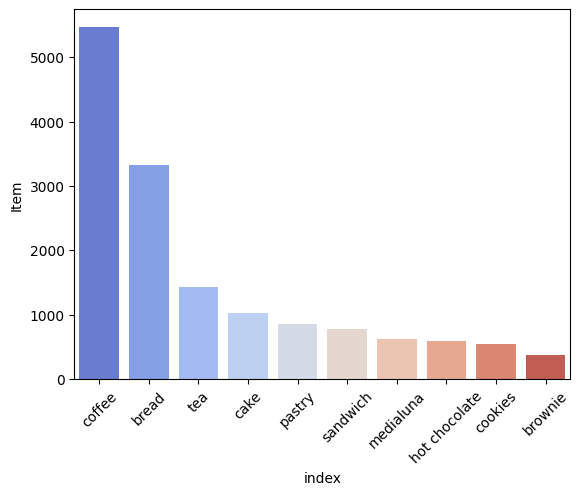

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = Frequency , x = "index", y = "Item", hue = "index", palette = "coolwarm")
plt.xticks(rotation = 45);

In [18]:
Transactions = pd.DataFrame(Bread_df.groupby("Transaction")["Item"].apply(set))
Transactions.reset_index(inplace=True)
Transactions["Item"] = Transactions["Item"].apply(list)
Transactions

,Transaction,Item
0,1,[bread]
1,2,[scandinavian]
2,3,"[jam, hot chocolate, cookies]"
3,4,[muffin]
4,5,"[coffee, bread, pastry]"
...,...,...
9460,9680,[bread]
9461,9681,"[christmas common, tea, truffles, spanish brunch]"
9462,9682,"[muffin, coffee, tea, tacos/fajita]"
9463,9683,"[coffee, pastry]"


In [19]:
te = TransactionEncoder()
te_data = te.fit(Transactions["Item"]).transform(Transactions["Item"])

Transactions_encoded = pd.DataFrame(te_data, columns= te.columns_)
Transactions_encoded

,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
%%timeit
complete_frequent_itemsets = apriori(Transactions_encoded, min_support=0.0000001, use_colnames=True)
complete_frequent_itemsets

12.3 s ± 943 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
frequent_itemsets = apriori(Transactions_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

28.2 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
complete_frequent_itemsets = apriori(Transactions_encoded, min_support=0.0000001, use_colnames=True)
complete_frequent_itemsets

,support,itemsets
0,0.000106,(adjustment)
1,0.004543,(afternoon with the baker)
2,0.036344,(alfajores)
3,0.000740,(argentina night)
4,0.004015,(art tray)
...,...,...
11195,0.000106,"(brownie, toast, coffee, chicken stew, extra s..."
11196,0.000106,"(cake, coffee, hot chocolate, sandwich, bread,..."
11197,0.000106,"(soup, coffee, chicken stew, sandwich, bread, ..."
11198,0.000106,"(coffee, tiffin, tea, mineral water, chocolate..."


In [23]:
frequent_itemsets = apriori(Transactions_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values("support", ascending = False)

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
...,...,...
11,0.010565,(hearty & seasonal)
20,0.010460,(salad)
30,0.010354,"(bread, alfajores)"
58,0.010037,"(bread, cake, coffee)"


In [24]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01) #, metric="confidence", min_threshold=0.6
rules.sort_values(by="support", ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(bread),(coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
9,(coffee),(bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
25,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
24,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
51,(tea),(coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014,-0.300482
50,(coffee),(tea),0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142,-0.413856
41,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
40,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
43,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
42,(coffee),(sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321


In terms of purchase volume, find the top 5 single item recommendations based on any single item purchases in the bakery. These recommendations will be used to optimally place the two items within reach from to each other.

Given the previous bar chart, we can see that the top 5 single items with the highest purchase volume are coffee, bread, tea, cake, and pastry. On the other hand, the top 5 single item recommendations based on any single item purchases in the bakery are bread -> coffee, coffee -> cake, coffee -> tea, coffee -> pastry, and sandwich and coffee, and vice versa, since in this case we only take into consideration the purchase volume, which is taken into consideration in the support.

Use the apriori algorithm with a reasonable minimum support (Justify your choice).

Given the size of the dataset, we will aim to keep the support relatively low, as setting it too high might significantly reduce the number of complete itemsets. Considering these factors, I believe that a support of 0.01 is a suitable choice. With our dataset containing 9465 transactions, having 1% of those would amount to roughly 95 transactions, which I consider to be a significant amount of data for analysis. It might have also made sense to use 100 data entries to determine the support, but that would further reduce our itemsets. With a support of 0.01, we manage to find 61 itemsets, which provides a sufficient amount of data to explore.

By what percentage has the apriori method reduced the computational cost of solving this query?

There's roughly an order of 1000 reduction in time, meaning that instead of consuming roughly 11 seconds to run the Apriori algorithm, by using a min_support of 0.01, we can reduce the time to roughly 30 milliseconds, which is 10^3 times less than running the complete Apriori model. Furthermore, we can also reduce the dataset size from 11200 to only 61 rows, which represents a reduction of 99.5% of the data. This reduction in data size contributes significantly to the faster execution of the model.

# Question 2 **(5 Points)**

Find out how/if the recommendations from the previous question change based on the time of the day. (morning, afternoon, evening). Comment on how similar/different the associations are.

In [25]:
Bread_df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,bread,30-10-2016 09:58,morning,weekend
1,2,scandinavian,30-10-2016 10:05,morning,weekend
2,2,scandinavian,30-10-2016 10:05,morning,weekend
3,3,hot chocolate,30-10-2016 10:07,morning,weekend
4,3,jam,30-10-2016 10:07,morning,weekend


In [26]:
Transactions_Time_Day = pd.DataFrame(Bread_df.groupby(["Transaction", "period_day"])["Item"].apply(set))
Transactions_Time_Day.reset_index(inplace=True)
Transactions_Time_Day["Item"] = Transactions_Time_Day["Item"].apply(list)
Transactions_Time_Day

,Transaction,period_day,Item
0,1,morning,[bread]
1,2,morning,[scandinavian]
2,3,morning,"[jam, hot chocolate, cookies]"
3,4,morning,[muffin]
4,5,morning,"[coffee, bread, pastry]"
...,...,...,...
9460,9680,afternoon,[bread]
9461,9681,afternoon,"[christmas common, tea, truffles, spanish brunch]"
9462,9682,afternoon,"[muffin, coffee, tea, tacos/fajita]"
9463,9683,afternoon,"[coffee, pastry]"


In [27]:
Transactions_Time_Day_encoded  = Transactions_encoded.copy()
Transactions_Time_Day_encoded = Transactions_Time_Day_encoded.merge(Transactions_Time_Day["period_day"], left_index=True, right_index=True)
Transactions_Time_Day_encoded

,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge,period_day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,morning
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,morning
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,morning
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,morning
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,afternoon
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,afternoon
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,afternoon
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,afternoon


In [28]:
frequent_itemsets_morning = apriori(Transactions_Time_Day_encoded[Transactions_Time_Day_encoded["period_day"] == "morning"].drop("period_day", axis = 1), min_support=0.01, use_colnames=True)
frequent_itemsets_morning.sort_values("support", ascending = False).head(10)

,support,itemsets
5,0.514989,(coffee)
2,0.363149,(bread)
15,0.139410,(pastry)
20,0.107482,(tea)
25,0.094078,"(bread, coffee)"
13,0.092615,(medialuna)
40,0.077261,"(coffee, pastry)"
4,0.063125,(cake)
38,0.054594,"(coffee, medialuna)"
9,0.052888,(hot chocolate)


In [29]:
rules_morning = association_rules(frequent_itemsets_morning, metric="support", min_threshold=0.01)
rules_morning.sort_values(by="support", ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(coffee),(bread),0.514989,0.363149,0.094078,0.182679,0.503041,-0.092940,0.779193,-0.670715
4,(bread),(coffee),0.363149,0.514989,0.094078,0.259060,0.503041,-0.092940,0.654589,-0.608034
34,(coffee),(pastry),0.514989,0.139410,0.077261,0.150024,1.076131,0.005466,1.012487,0.145863
35,(pastry),(coffee),0.139410,0.514989,0.077261,0.554196,1.076131,0.005466,1.087946,0.082206
31,(medialuna),(coffee),0.092615,0.514989,0.054594,0.589474,1.144633,0.006898,1.181437,0.139255
30,(coffee),(medialuna),0.514989,0.092615,0.054594,0.106010,1.144633,0.006898,1.014984,0.260526
13,(pastry),(bread),0.139410,0.363149,0.047039,0.337413,0.929130,-0.003588,0.961158,-0.081416
12,(bread),(pastry),0.363149,0.139410,0.047039,0.129530,0.929130,-0.003588,0.988650,-0.106959
40,(coffee),(tea),0.514989,0.107482,0.040946,0.079508,0.739729,-0.014407,0.969609,-0.420438
41,(tea),(coffee),0.107482,0.514989,0.040946,0.380952,0.739729,-0.014407,0.783479,-0.282752


Here, we notice a change in single-item purchases in the morning. Instead of coffee, bread, tea, cake, and pastry being the most popular, we observe that coffee, bread, pastry, tea, and medialuna are the top choices. Furthermore, regarding association rules, we notice a different order compared to the whole dataset. In this case, instead of bread -> coffee, coffee -> cake, coffee -> tea, coffee -> pastry, and sandwich -> coffee, and vice versa, we have bread -> coffee, pastry -> coffee, coffee -> medialuna, bread -> pastry, and tea -> coffee, and vice versa. The only difference here is coffee -> medialuna, which replaces coffee -> cake, and bread -> pastry, which replaces sandwich -> coffee.

In [30]:
frequent_itemsets_afternoon = apriori(Transactions_Time_Day_encoded[Transactions_Time_Day_encoded["period_day"] == "afternoon"].drop("period_day", axis = 1), min_support=0.01, use_colnames=True)
frequent_itemsets_afternoon.sort_values("support", ascending = False).head(10)

,support,itemsets
6,0.459815,(coffee)
2,0.305758,(bread)
28,0.169778,(tea)
4,0.136766,(cake)
22,0.115936,(sandwich)
36,0.089998,"(bread, coffee)"
45,0.071920,"(coffee, cake)"
56,0.062291,"(coffee, sandwich)"
13,0.061505,(hot chocolate)
26,0.060719,(soup)


In [31]:
rules_afternoon = association_rules(frequent_itemsets_afternoon, metric="support", min_threshold=0.01)
rules_afternoon.sort_values(by="support", ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(coffee),(bread),0.459815,0.305758,0.089998,0.195726,0.640136,-0.050594,0.863192,-0.509971
8,(bread),(coffee),0.305758,0.459815,0.089998,0.294344,0.640136,-0.050594,0.765508,-0.447439
26,(coffee),(cake),0.459815,0.136766,0.071920,0.156410,1.143638,0.009033,1.023287,0.232508
27,(cake),(coffee),0.136766,0.459815,0.071920,0.525862,1.143638,0.009033,1.139299,0.145496
49,(sandwich),(coffee),0.115936,0.459815,0.062291,0.537288,1.168487,0.008982,1.167432,0.163102
48,(coffee),(sandwich),0.459815,0.115936,0.062291,0.135470,1.168487,0.008982,1.022595,0.266932
56,(coffee),(tea),0.459815,0.169778,0.057182,0.124359,0.732480,-0.020884,0.948131,-0.403381
57,(tea),(coffee),0.169778,0.459815,0.057182,0.336806,0.732480,-0.020884,0.814519,-0.305513
23,(tea),(bread),0.169778,0.305758,0.033798,0.199074,0.651085,-0.018112,0.866800,-0.392277
22,(bread),(tea),0.305758,0.169778,0.033798,0.110540,0.651085,-0.018112,0.933400,-0.435640


Here, we notice a change in single-item purchases in the morning. Instead of coffee, bread, tea, cake, and pastry being the most popular, we observe that coffee, bread, tea, cake, and sandwich are the top choices. Furthermore, regarding association rules, we notice a different order compared to the whole dataset. In this case, instead of bread -> coffee, coffee -> cake, coffee -> tea, coffee -> pastry, and sandwich -> coffee, and vice versa, we have bread -> coffee, cake -> coffee, coffee -> sandwich, bread -> tea, and tea -> coffee, and vice versa. The only difference here is bread -> tea, which replaces coffee -> pastry.

In [32]:
frequent_itemsets_evening = apriori(Transactions_Time_Day_encoded[Transactions_Time_Day_encoded["period_day"] == "evening"].drop("period_day", axis = 1), min_support=0.01, use_colnames=True)
frequent_itemsets_evening.sort_values("support", ascending = False).head(10)

,support,itemsets
6,0.287356,(coffee)
2,0.195402,(bread)
29,0.172414,(tea)
4,0.107280,(cake)
32,0.080460,(tshirt)
14,0.080460,(hot chocolate)
8,0.076628,(cookies)
50,0.061303,"(coffee, cake)"
1,0.061303,(alfajores)
18,0.057471,(medialuna)


In [33]:
rules_evening = association_rules(frequent_itemsets_evening, metric="support", min_threshold=0.01)
rules_evening.sort_values(by="support", ascending = False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(coffee),(cake),0.287356,0.107280,0.061303,0.213333,1.988571,0.030475,1.134814,0.697581
31,(cake),(coffee),0.107280,0.287356,0.061303,0.571429,1.988571,0.030475,1.662835,0.556867
58,(coffee),(tea),0.287356,0.172414,0.049808,0.173333,1.005333,0.000264,1.001112,0.007444
59,(tea),(coffee),0.172414,0.287356,0.049808,0.288889,1.005333,0.000264,1.002155,0.006410
29,(tea),(bread),0.172414,0.195402,0.038314,0.222222,1.137255,0.004624,1.034483,0.145833
28,(bread),(tea),0.195402,0.172414,0.038314,0.196078,1.137255,0.004624,1.029437,0.150000
38,(cake),(tea),0.107280,0.172414,0.034483,0.321429,1.864286,0.015986,1.219601,0.519313
42,(coffee),(cookies),0.287356,0.076628,0.034483,0.120000,1.566000,0.012463,1.049286,0.507168
43,(cookies),(coffee),0.076628,0.287356,0.034483,0.450000,1.566000,0.012463,1.295716,0.391425
44,(coffee),(hot chocolate),0.287356,0.080460,0.034483,0.120000,1.491429,0.011362,1.044932,0.462366


Here, we notice a change in single-item purchases in the morning. Instead of coffee, bread, tea, cake, and pastry being the most popular, we observe that coffee, bread, tea, cake, and tshirt are the top choices. Furthermore, regarding association rules, we notice a different order compared to the whole dataset. In this case, instead of bread -> coffee, coffee -> cake, coffee -> tea, coffee -> pastry, and sandwich -> coffee, and vice versa, we have cake -> coffee, tea -> coffee, tea -> bread, cookies -> coffee, coffee -> hot chocolate, tea -> cake, alfajores -> coffee, and vice verse. Here, we notice a more stark difference since we notice that the last 4 rules have the same support, so in this case it would not be top 5, but more precisely top 7.

Find out how/if the recommendations from the previous question change based on the time of the day. (morning, afternoon, evening). Comment on how similar/different the associations are.

Based on the findings I discovered, there is little change in the associations with the highest support, as they remain consistent throughout the data. However, from the third place onwards, we observe significant variance in the rules. In the morning, medialuna emerges, while in the afternoon, sandwich becomes prominent. Surprisingly, in the evening, the rules involve hot chocolate, alfajores, and cookies. It was not surprising to observe this variation, as fluctuations in demand were expected throughout the day.

# Question 3 **(10 Points)**

Find out if the day of the week (i.e., Monday, Tuesday, ..) affects the customers' purchase patterns. Compute the top 3 most common item associations for each day. Comment on how similar/different the rules are.

Use [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and [dayofweek](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html) to generate the day of the week for any date.

In [34]:
Bread_df['date_time'] = pd.to_datetime(Bread_df['date_time'])
Bread_df['day_of_week'] = Bread_df['date_time'].dt.dayofweek
day_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
Bread_df["day_of_week"] = Bread_df["day_of_week"].map(day_map)
Bread_df

,Transaction,Item,date_time,period_day,weekday_weekend,day_of_week
0,1,bread,2016-10-30 09:58:00,morning,weekend,Sunday
1,2,scandinavian,2016-10-30 10:05:00,morning,weekend,Sunday
2,2,scandinavian,2016-10-30 10:05:00,morning,weekend,Sunday
3,3,hot chocolate,2016-10-30 10:07:00,morning,weekend,Sunday
4,3,jam,2016-10-30 10:07:00,morning,weekend,Sunday
...,...,...,...,...,...,...
20502,9682,coffee,2017-09-04 14:32:00,afternoon,weekend,Monday
20503,9682,tea,2017-09-04 14:32:00,afternoon,weekend,Monday
20504,9683,coffee,2017-09-04 14:57:00,afternoon,weekend,Monday
20505,9683,pastry,2017-09-04 14:57:00,afternoon,weekend,Monday


In [35]:
Transactions_Day_Week = pd.DataFrame(Bread_df.groupby(["Transaction", "day_of_week"])["Item"].apply(set))
Transactions_Day_Week.reset_index(inplace=True)
Transactions_Day_Week["Item"] = Transactions_Day_Week["Item"].apply(list)
Transactions_Day_Week

,Transaction,day_of_week,Item
0,1,Sunday,[bread]
1,2,Sunday,[scandinavian]
2,3,Sunday,"[jam, hot chocolate, cookies]"
3,4,Sunday,[muffin]
4,5,Sunday,"[coffee, bread, pastry]"
...,...,...,...
9460,9680,Monday,[bread]
9461,9681,Monday,"[christmas common, tea, truffles, spanish brunch]"
9462,9682,Monday,"[muffin, coffee, tea, tacos/fajita]"
9463,9683,Monday,"[coffee, pastry]"


In [36]:
Transactions_Day_Week_encoded = Transactions_encoded.copy()
Transactions_Day_Week_encoded = Transactions_Day_Week_encoded.merge(Transactions_Day_Week["day_of_week"], left_index=True, right_index=True)
Transactions_Day_Week_encoded

,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge,day_of_week
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Sunday
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Sunday
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Sunday
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Sunday
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Monday
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Monday
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Monday
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Monday


In [37]:
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Top_3_Per_Day = pd.DataFrame()
for i in days_of_week:
  frequent_itemsets = apriori(Transactions_Day_Week_encoded[Transactions_Day_Week_encoded["day_of_week"] == i].drop("day_of_week", axis = 1), min_support=0.01, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
  rules = rules.sort_values(by="support", ascending = False).head(6)
  rules["Day"] = i
  Top_3_Per_Day = pd.concat([Top_3_Per_Day, rules], ignore_index=True)

Top_3_Per_Day

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Day
0,(bread),(coffee),0.321999,0.489244,0.089521,0.278017,0.568259,-0.068015,0.707436,-0.528433,Monday
1,(coffee),(bread),0.489244,0.321999,0.089521,0.182979,0.568259,-0.068015,0.829845,-0.597993,Monday
2,(coffee),(pastry),0.489244,0.081194,0.046495,0.095035,1.170479,0.006772,1.015295,0.285164,Monday
3,(tea),(coffee),0.155448,0.489244,0.046495,0.299107,0.611367,-0.029556,0.728723,-0.429446,Monday
4,(coffee),(tea),0.489244,0.155448,0.046495,0.095035,0.611367,-0.029556,0.933244,-0.554483,Monday
5,(pastry),(coffee),0.081194,0.489244,0.046495,0.572650,1.170479,0.006772,1.195170,0.158520,Monday
6,(bread),(coffee),0.327095,0.515867,0.099268,0.303483,0.588297,-0.069470,0.695077,-0.509804,Tuesday
7,(coffee),(bread),0.515867,0.327095,0.099268,0.192429,0.588297,-0.069470,0.833245,-0.591088,Tuesday
8,(cake),(coffee),0.104963,0.515867,0.065907,0.627907,1.217189,0.011760,1.301109,0.199360,Tuesday
9,(coffee),(cake),0.515867,0.104963,0.065907,0.127760,1.217189,0.011760,1.026136,0.368565,Tuesday


In [38]:
order_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

Top_3_Per_Day["Day"] = pd.Categorical(Top_3_Per_Day["Day"], categories = order_day, ordered=True)

Top_3_Per_Day_sorted = Top_3_Per_Day.sort_values(["Day", "support", "lift"], ascending=[True, False, False])

Top_3_Per_Day_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Day
0,(bread),(coffee),0.321999,0.489244,0.089521,0.278017,0.568259,-0.068015,0.707436,-0.528433,Monday
1,(coffee),(bread),0.489244,0.321999,0.089521,0.182979,0.568259,-0.068015,0.829845,-0.597993,Monday
2,(coffee),(pastry),0.489244,0.081194,0.046495,0.095035,1.170479,0.006772,1.015295,0.285164,Monday
5,(pastry),(coffee),0.081194,0.489244,0.046495,0.572650,1.170479,0.006772,1.195170,0.158520,Monday
3,(tea),(coffee),0.155448,0.489244,0.046495,0.299107,0.611367,-0.029556,0.728723,-0.429446,Monday
4,(coffee),(tea),0.489244,0.155448,0.046495,0.095035,0.611367,-0.029556,0.933244,-0.554483,Monday
7,(coffee),(bread),0.515867,0.327095,0.099268,0.192429,0.588297,-0.069470,0.833245,-0.591088,Tuesday
6,(bread),(coffee),0.327095,0.515867,0.099268,0.303483,0.588297,-0.069470,0.695077,-0.509804,Tuesday
9,(coffee),(cake),0.515867,0.104963,0.065907,0.127760,1.217189,0.011760,1.026136,0.368565,Tuesday
8,(cake),(coffee),0.104963,0.515867,0.065907,0.627907,1.217189,0.011760,1.301109,0.199360,Tuesday


In [39]:
rows = []

for day in days_of_week:
    row = Top_3_Per_Day_sorted[Top_3_Per_Day_sorted["Day"] == day].iloc[0]
    row_2 = Top_3_Per_Day_sorted[Top_3_Per_Day_sorted["Day"] == day].iloc[1]
    rows.append(row)
    rows.append(row_2)

Top_1 = pd.DataFrame(rows)

Top_1

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Day
0,(bread),(coffee),0.321999,0.489244,0.089521,0.278017,0.568259,-0.068015,0.707436,-0.528433,Monday
1,(coffee),(bread),0.489244,0.321999,0.089521,0.182979,0.568259,-0.068015,0.829845,-0.597993,Monday
7,(coffee),(bread),0.515867,0.327095,0.099268,0.192429,0.588297,-0.069470,0.833245,-0.591088,Tuesday
6,(bread),(coffee),0.327095,0.515867,0.099268,0.303483,0.588297,-0.069470,0.695077,-0.509804,Tuesday
12,(bread),(coffee),0.319521,0.488029,0.086556,0.270893,0.555076,-0.069380,0.702189,-0.540848,Wednesday
13,(coffee),(bread),0.488029,0.319521,0.086556,0.177358,0.555076,-0.069380,0.827188,-0.610232,Wednesday
18,(bread),(coffee),0.330260,0.465214,0.099749,0.302030,0.649229,-0.053893,0.766203,-0.446508,Thursday
19,(coffee),(bread),0.465214,0.330260,0.099749,0.214414,0.649229,-0.053893,0.852536,-0.502559,Thursday
24,(bread),(coffee),0.314672,0.467825,0.072716,0.231084,0.493954,-0.074496,0.692111,-0.599179,Friday
25,(coffee),(bread),0.467825,0.314672,0.072716,0.155433,0.493954,-0.074496,0.811455,-0.658129,Friday


In [40]:
rows = []

for day in days_of_week:
    row = Top_3_Per_Day_sorted[Top_3_Per_Day_sorted["Day"] == day].iloc[2]
    row_2 = Top_3_Per_Day_sorted[Top_3_Per_Day_sorted["Day"] == day].iloc[3]
    rows.append(row)
    rows.append(row_2)

Top_2 = pd.DataFrame(rows)

Top_2

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Day
2,(coffee),(pastry),0.489244,0.081194,0.046495,0.095035,1.170479,0.006772,1.015295,0.285164,Monday
5,(pastry),(coffee),0.081194,0.489244,0.046495,0.572650,1.170479,0.006772,1.195170,0.158520,Monday
9,(coffee),(cake),0.515867,0.104963,0.065907,0.127760,1.217189,0.011760,1.026136,0.368565,Tuesday
8,(cake),(coffee),0.104963,0.515867,0.065907,0.627907,1.217189,0.011760,1.301109,0.199360,Tuesday
14,(coffee),(tea),0.488029,0.146409,0.068140,0.139623,0.953649,-0.003312,0.992113,-0.086704,Wednesday
15,(tea),(coffee),0.146409,0.488029,0.068140,0.465409,0.953649,-0.003312,0.957686,-0.053873,Wednesday
20,(coffee),(pastry),0.465214,0.101425,0.055323,0.118919,1.172482,0.008138,1.019855,0.275078,Thursday
21,(pastry),(coffee),0.101425,0.465214,0.055323,0.545455,1.172482,0.008138,1.176530,0.163713,Thursday
27,(coffee),(cake),0.467825,0.095238,0.050837,0.108666,1.140990,0.006282,1.015065,0.232195,Friday
26,(cake),(coffee),0.095238,0.467825,0.050837,0.533784,1.140990,0.006282,1.141477,0.136576,Friday


In [41]:
rows = []

for day in days_of_week:
    row = Top_3_Per_Day_sorted[Top_3_Per_Day_sorted["Day"] == day].iloc[4]
    row_2 = Top_3_Per_Day_sorted[Top_3_Per_Day_sorted["Day"] == day].iloc[5]
    rows.append(row)
    rows.append(row_2)

Top_3 = pd.DataFrame(rows)

Top_3

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Day
3,(tea),(coffee),0.155448,0.489244,0.046495,0.299107,0.611367,-0.029556,0.728723,-0.429446,Monday
4,(coffee),(tea),0.489244,0.155448,0.046495,0.095035,0.611367,-0.029556,0.933244,-0.554483,Monday
11,(pastry),(coffee),0.096013,0.515867,0.061025,0.635593,1.232088,0.011495,1.328552,0.208377,Tuesday
10,(coffee),(pastry),0.515867,0.096013,0.061025,0.118297,1.232088,0.011495,1.025273,0.389087,Tuesday
16,(cake),(coffee),0.113260,0.488029,0.064457,0.569106,1.166130,0.009183,1.188158,0.160659,Wednesday
17,(coffee),(cake),0.488029,0.113260,0.064457,0.132075,1.166130,0.009183,1.021679,0.278263,Wednesday
22,(cake),(coffee),0.108969,0.465214,0.051970,0.476923,1.025170,0.001276,1.022385,0.027554,Thursday
23,(coffee),(cake),0.465214,0.108969,0.051970,0.111712,1.025170,0.001276,1.003088,0.045910,Thursday
28,(tea),(coffee),0.143501,0.467825,0.045045,0.313901,0.670980,-0.022088,0.775654,-0.364075,Friday
29,(coffee),(tea),0.467825,0.143501,0.045045,0.096286,0.670980,-0.022088,0.947755,-0.479552,Friday


From our results, we can observe that bread and coffee are the most popular choices in the bakery, and they also have the highest support for their association rule. They are the most popular items bought together every day. Nevertheless, this does not necessarily mean that they are a good pair of items to recommend together, as we are only considering the support in this case, focusing solely on purchasing volume. We notice some differences for the items ranked second based on support, which range from pastry -> coffee to cake -> coffee or tea -> coffee. This might indicate that coffee is a very popular pairing with these items. Indeed, coffee is the only item consistent in all association rules for the second-highest support for each day. Lastly, we have the association rule with the third-highest support, which also varies for each day. As mentioned in the previous point, coffee remains the only item that is consistently present in every rule even for the association rule with the third-highest support.

# Question 4 **(8 Points)**

For the items that are bought together in more than 500 transactions:

1. for the sake of item promotion, suggest a strong rule that indicate that  the second item is *more likely than not* to be bought as well once the first one is bought.
2. Show a pair of items that seem to be ill-suited for being promoted together.

Explain your answers.

In [42]:
#We first calculate the support require in order to obtain more than 500 transactions

min_support = 500/9465
min_support

0.05282620179609086

In [43]:
frequent_itemsets_500 = apriori(Transactions_encoded, min_support= min_support, use_colnames=True)
frequent_itemsets_500.sort_values("support", ascending = False)

,support,itemsets
2,0.478394,(coffee)
0,0.327205,(bread)
8,0.142631,(tea)
1,0.103856,(cake)
9,0.090016,"(bread, coffee)"
6,0.086107,(pastry)
7,0.071844,(sandwich)
5,0.061807,(medialuna)
4,0.058320,(hot chocolate)
10,0.054728,"(coffee, cake)"


In [44]:
rules_500 = association_rules(frequent_itemsets_500, metric="support", min_threshold=0.01) #, metric="confidence", min_threshold=0.6
rules_500.sort_values(by="support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bread),(coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
1,(coffee),(bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
2,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840


1. for the sake of item promotion, suggest a strong rule that indicate that  the second item is *more likely than not* to be bought as well once the first one is bought.

From our results, it appears that one of the item promotions available is the association rule between cake and coffee, which has more than 500 transactions and also has a very high confidence of 0.52. This means that if someone buys a cake, more than half of the time they also buy a coffee. This does not imply the opposite. Indeed, the rule coffee -> cake has a confidence of 0.11, which is extremely small compared to the confidence we had for cake -> coffee. Hence, this association rule can be exploited in order to increase revenue for the bakery. Also, this rule has a pretty high lift of higher than one, which means that they are highly correlated. Furthermore, we can also see that the Zhang's metric is positive, which indicates association, whereas a negative value indicates dissociation.



2. Show a pair of items that seem to be ill-suited for being promoted together.

According to the data obtained from the table, we observe that we have only 4 association rules. In this case, the items that seem to be ill-suited for promotion together appear to be coffee and bread. Despite their high support, as they are the most commonly bought items at the bakery, they have very low confidence, with bread and coffee having a confidence of 0.27 and coffee -> bread having a confidence of 0.19. Furthermore, the lift that they exhibit is lower than 1, indicating that item Y is unlikely to be bought if item X is bought. Hence, this shows a negative correlation between the two items, since if they were uncorrelated and independent from each other they would have had a higher lift. Indeed, they also have negative leverage, further indicating that coffee and bread have a negative dependance. Lastly, looking at the Zhang's metric, we see that it's negative, showing dissociation between the two items.

# Question 5 **(2 Points)**

Give the following rule from the dataset:

(Valentine's card) -> (Tshirt)

Find its lift, confidence, and support. Do these metrics support the claim that placing valentine cards next to the t-shirt stand will substantially  increase t-shirt sales? Explain your conclusion.

In [45]:
# Python code if any
frequent_itemsets_valentine = apriori(Transactions_encoded, min_support= 0.000001, use_colnames=True)
frequent_itemsets_valentine.sort_values("support", ascending = False)

,support,itemsets
23,0.478394,(coffee)
11,0.327205,(bread)
83,0.142631,(tea)
15,0.103856,(cake)
284,0.090016,"(bread, coffee)"
...,...,...
5055,0.000106,"(bakewell, sandwich, toast, juice)"
5054,0.000106,"(tea, sandwich, bakewell, juice)"
5053,0.000106,"(muffin, tea, bakewell, juice)"
5052,0.000106,"(muffin, smoothies, bakewell, juice)"


In [46]:
rules_valentine = association_rules(frequent_itemsets_valentine, metric="support", min_threshold=0.0001) #, metric="confidence", min_threshold=0.6

In [47]:
rules_valentine

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(afternoon with the baker),(argentina night),0.004543,0.000740,0.000211,0.046512,62.890365,0.000208,1.048005,0.988591
1,(argentina night),(afternoon with the baker),0.000740,0.004543,0.000211,0.285714,62.890365,0.000208,1.393640,0.984828
2,(bread),(afternoon with the baker),0.327205,0.004543,0.000317,0.000969,0.213222,-0.001170,0.996422,-0.845786
3,(afternoon with the baker),(bread),0.004543,0.327205,0.000317,0.069767,0.213222,-0.001170,0.723254,-0.787541
4,(afternoon with the baker),(brownie),0.004543,0.040042,0.000211,0.046512,1.161563,0.000029,1.006785,0.139726
...,...,...,...,...,...,...,...,...,...,...
264643,(chocolates),"(coffee, alfajores, tiffin, tea, mineral water...",0.000951,0.000106,0.000106,0.111111,1051.666667,0.000106,1.124881,1.000000
264644,(coke),"(coffee, alfajores, tiffin, tea, mineral water...",0.019440,0.000106,0.000106,0.005435,51.440217,0.000104,1.005358,1.000000
264645,(pastry),"(coffee, alfajores, tiffin, tea, mineral water...",0.086107,0.000106,0.000106,0.001227,11.613497,0.000097,1.001123,1.000000
264646,(cookies),"(coffee, alfajores, tiffin, tea, mineral water...",0.054411,0.000106,0.000106,0.001942,18.378641,0.000100,1.001840,1.000000


In [48]:
rules_valentine[rules_valentine["antecedents"] == {"valentine's card"}].sort_values("support", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2092,(valentine's card),(tshirt),0.001373,0.002219,0.000211,0.153846,69.340659,0.000208,1.179196,0.986934
701,(valentine's card),(cake),0.001373,0.103856,0.000106,0.076923,0.740668,-0.000037,0.970822,-0.259596
1927,(valentine's card),(postcard),0.001373,0.001057,0.000106,0.076923,72.807692,0.000104,1.082189,0.987622
1952,(valentine's card),(salad),0.001373,0.010460,0.000106,0.076923,7.354312,0.000091,1.072002,0.865214
11818,(valentine's card),"(cake, salad)",0.001373,0.001373,0.000106,0.076923,56.005917,0.000104,1.081845,0.983496
20619,(valentine's card),"(postcard, tshirt)",0.001373,0.000634,0.000106,0.076923,121.346154,0.000105,1.082647,0.993123


In [49]:
0.000211*9465

1.997115

Find its lift, confidence, and support. Do these metrics support the claim that placing valentine cards next to the t-shirt stand will substantially  increase t-shirt sales? Explain your conclusion.

From the table above, we can see that we have found the results we were looking for. We observe that the association rule "valentine's card -> tshirt" has a very low support, barely 0.0002, which corresponds to only two transactions. Furthermore, we note that the lift is extremely high due to the very small support for both the antecedent and consequent. Additionally, the confidence is also very low, at 0.15. Nevertheless, it's important to notice that the very small number of transactions might not accurately reflect the actual correlation between the two items due to the small sample size. These low results could be attributed to outliers. It would be essential for us to conduct a power test to verify whether this association rule is robust enough to hold, but with only 2 transactions, it is very challenging to confirm the results found from this association rule. Personally, given this information, I would not believe that placing Valentine cards next to the T-shirt stand will substantially increase T-shirt sales.